In [4]:
!pip install pandas matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.4/159.4 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 95.2 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.4/313.4 kB 75.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 107.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 105.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 kB 36.3 MB/s eta 0:00:00


In [2]:
import os
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

OUT_DIR = "./figures/"
if not os.path.exists(OUT_DIR): os.mkdir(OUT_DIR)

color_mapping = None

In [10]:
files = os.listdir("./results/cataract101_rgb/split_1/")
files.sort()
#cases = files[::2]
files

['case_278',
 'case_278.npy',
 'case_350',
 'case_350.npy',
 'case_734',
 'case_734.npy',
 'case_738',
 'case_738.npy',
 'case_745',
 'case_745.npy',
 'case_771',
 'case_771.npy',
 'case_786',
 'case_786.npy',
 'case_788',
 'case_788.npy',
 'case_796',
 'case_796.npy',
 'case_797',
 'case_797.npy',
 'case_799',
 'case_799.npy',
 'case_806',
 'case_806.npy',
 'case_807',
 'case_807.npy',
 'case_825',
 'case_825.npy',
 'case_827',
 'case_827.npy',
 'case_840',
 'case_840.npy',
 'case_846',
 'case_846.npy',
 'case_853',
 'case_853.npy',
 'case_880',
 'case_880.npy',
 'case_889',
 'case_889.npy',
 'case_890',
 'case_890.npy',
 'case_899',
 'case_899.npy',
 'case_901',
 'case_901.npy',
 'case_907',
 'case_907.npy',
 'case_921',
 'case_921.npy',
 'case_922',
 'case_922.npy',
 'case_932',
 'case_932.npy']

In [4]:
def get_labels_start_end_time(frame_wise_labels, bg_class=["background"]):
    labels = []
    starts = []
    ends = []
    last_label = frame_wise_labels[0]
    if frame_wise_labels[0] not in bg_class:
        labels.append(frame_wise_labels[0])
        starts.append(0)
    for i in range(len(frame_wise_labels)):
        if frame_wise_labels[i] != last_label:
            if frame_wise_labels[i] not in bg_class:
                labels.append(frame_wise_labels[i])
                starts.append(i)
            if last_label not in bg_class:
                ends.append(i)
            last_label = frame_wise_labels[i]
    if last_label not in bg_class:
        ends.append(i)
    return labels, starts, ends

def read_file(path): 
    with open(path, 'r') as f: 
        content = f.read()
    return content

def survey(results, category_names, colors, ax, fig_size=(25, 3)):
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data))

    #print(data)
    #print(data_cum)
    #print(np.sum(data))
    
    for i, (colname, color) in enumerate(zip(category_names, colors)):
        #print(colname)
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        rects = ax.barh([""], widths, left=starts, height=0.75, label=colname, color=color)

        r, g, b = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        ax.bar_label(rects, labels=[colname], label_type='center', color=text_color, rotation=90 if fig_size[1] >=3 else 0 )
    
    #ax.legend(ncols=len(category_names), bbox_to_anchor=(0, 1), loc='lower left', fontsize='small')
    return ax

x = 0

In [6]:
dataset = "cataract101_rgb"
split = 1

files = os.listdir(f"./results/{dataset}/split_{split}/")
files.sort()
cases = files[::2]


for case in cases:
    pred_path = f"./results/{dataset}/split_{split}/{case}"
    gt_path = f"./data/{dataset}/groundTruth/{case}.txt"

    predictions = read_file(pred_path).split('\n')[1].split()
    ground_truth = read_file(gt_path).split('\n')
    labels_gt, start_gt, end_gt = get_labels_start_end_time(ground_truth)
    labels_pred, start_pred, end_pred = get_labels_start_end_time(predictions)

    colors = np.random.rand(len(labels_gt),3)
    color_mapping = {labels_gt[i]: colors[i,:] for i in range(len(labels_gt))} if color_mapping == None else color_mapping

    data_gt = {"Ground Truth":[end_gt[i] - start_gt[i] for i, elm in enumerate(start_gt)]}
    data_pred = {"Prediction": [end_pred[i] - start_pred[i] for i, elm in enumerate(start_pred)]}
    
    fig, axs = plt.subplots(2,1, figsize=((25, 6)), sharex=True, sharey=True, layout="tight")
    axs[0].axis('off')
    axs[1].axis('off')

    colors_gt = [color_mapping[elm] for elm in labels_gt]
    ax = survey(data_gt, labels_gt, colors_gt, axs[0])
    colors_pred = [color_mapping[elm] for elm in labels_pred]
    ax2 = survey(data_pred, labels_pred, colors_pred, axs[1])
    plt.show()
    fig.savefig(OUT_DIR + case + ".png")

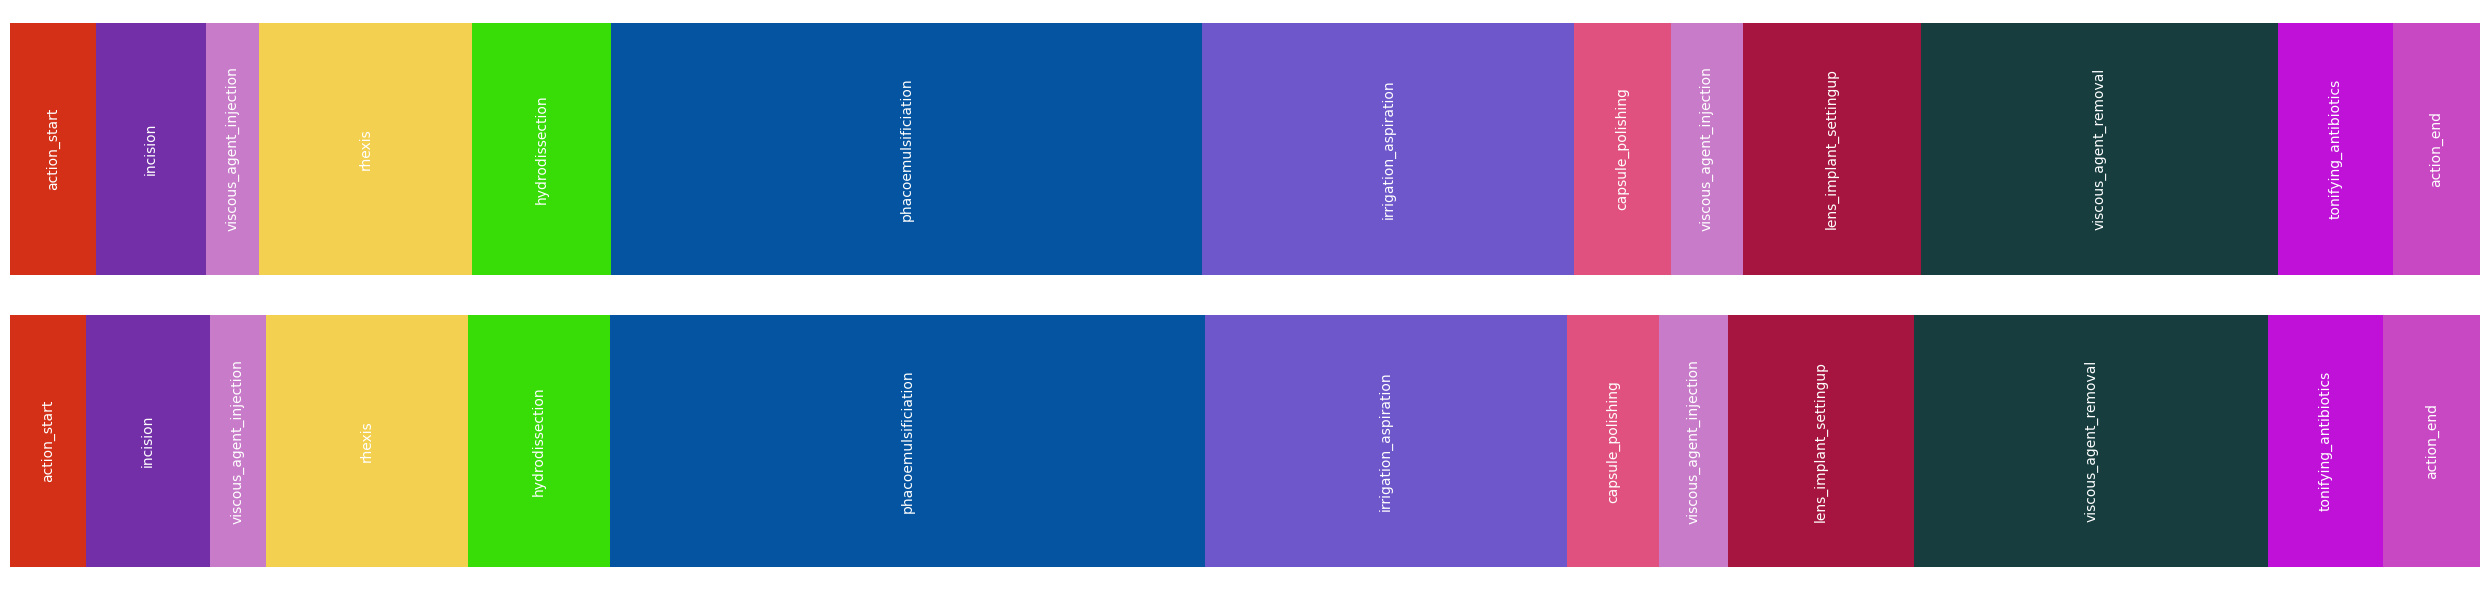

In [7]:
#print(color_mapping, labels_gt)

fig, axs = plt.subplots(2,1, figsize=((25, 6)), sharex=True, sharey=True, layout="tight")
axs[0].axis('off')
axs[1].axis('off')

colors_gt = [color_mapping[elm] for elm in labels_gt]
ax = survey(data_gt, labels_gt, colors_gt, axs[0])
colors_pred = [color_mapping[elm] for elm in labels_pred]
ax2 = survey(data_pred, labels_pred, colors_pred, axs[1])
plt.show()
fig.savefig(OUT_DIR + case + ".png")

x += 1

In [440]:

plt.show()
#fig.savefig(OUT_DIR + case + "_pred.png")